In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cifar10 = tf.keras.datasets.cifar10

(train_inputs, train_labels), (test_inputs, test_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [3]:
print(train_inputs.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


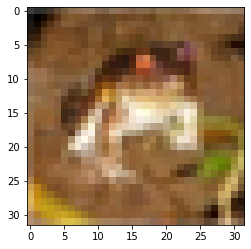

In [4]:
plt.imshow(train_inputs[0])
plt.show()

In [5]:
train_inputs = train_inputs / 255.0
test_inputs = test_inputs / 255.0

In [6]:
model = keras.Sequential([
                          keras.Input(shape=(32,32,3)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dense(10,activation='softmax'),
                          ])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [8]:
model_flatten = tf.keras.Model(inputs=model.input, outputs=model.layers[0].output)
test_output1 = model_flatten(tf.expand_dims(train_inputs[0],axis=0))
print(test_output1)

tf.Tensor([[0.23137255 0.24313726 0.24705882 ... 0.48235294 0.36078432 0.28235295]], shape=(1, 3072), dtype=float32)


In [ ]:
model_dense1 = tf.keras.Model(inputs=model.input, outputs=model.layers[1].output)
test_output2 = model_dense1(tf.expand_dims(train_inputs[0],axis=0))
print(test_output2)

In [10]:
model_dense2 = tf.keras.Model(inputs=model.input, outputs=model.layers[2].output)
test_output3 = model_dense2(tf.expand_dims(train_inputs[0],axis=0))
print(test_output3)

tf.Tensor(
[[0.07492905 0.11894508 0.0458853  0.09158649 0.13546294 0.05817938
  0.08278215 0.13890345 0.08481668 0.16850954]], shape=(1, 10), dtype=float32)


In [11]:
model.compile(optimizer='Adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

In [12]:
model.fit(x=train_inputs,
          y=train_labels,
          batch_size=8,
          epochs=20,
          validation_data=(test_inputs,test_labels))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


6250/6250 [==============================] - 23s 4ms/step - loss: 1.9328 - acc: 0.2968 - val_loss: 1.8566 - val_acc: 0.3291
Epoch 2/20
6250/6250 [==============================] - 20s 3ms/step - loss: 1.8269 - acc: 0.3422 - val_loss: 1.7877 - val_acc: 0.3545
Epoch 3/20
6250/6250 [==============================] - 21s 3ms/step - loss: 1.7930 - acc: 0.3564 - val_loss: 1.7599 - val_acc: 0.3706
Epoch 4/20
6250/6250 [==============================] - 19s 3ms/step - loss: 1.7749 - acc: 0.3629 - val_loss: 1.8258 - val_acc: 0.3465
Epoch 5/20
6250/6250 [==============================] - 21s 3ms/step - loss: 1.7637 - acc: 0.3715 - val_loss: 1.7663 - val_acc: 0.3667
Epoch 6/20
6250/6250 [==============================] - 21s 3ms/step - loss: 1.7588 - acc: 0.3713 - val_loss: 1.7487 - val_acc: 0.3748
Epoch 7/20
6250/6250 [==============================] - 22s 3ms/step - loss: 1.7508 - acc: 0.3749 - val_loss: 1.8060 - val_acc: 0.3565
Epoch 8/20
6250/6250 [==============================] - 21s 3ms/st

In [ ]:
model = keras.Sequential([
                          tf.keras.Input(shape=(32,32,3)),
                          tf.keras.layers.Conv2D(kernel_size=(4, 4), strides = (1,1), filters = 12),
                          tf.keras.layers.MaxPool2D(),
                          tf.keras.layers.Conv2D(kernel_size=(4, 4), strides = (1,1), filters = 8),
                          tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(10, activation = "softmax"),
                          '''
                          TODO
                          Convolution layer 2개, Pooling layer 하나, flatten, FC layer(dense)로 모델을 완성하세요
                          '''
])

In [ ]:
model.compile(optimizer='Adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

In [ ]:
model.fit(x=train_inputs,
          y=train_labels,
          batch_size=8,
          epochs=20,
          validation_data=(test_inputs,test_labels))